In [30]:
class LogisticRegression:
    
    def __init__(self,df,alpha=0.1,lambda_value=0): 
        self.n_iterations=1000
        # assign the input arguments to class attributes
        # INSERT CODE HERE
        
        self.X = df[df.columns.difference(['target'])]
        self.y = df.target
        self.n_features = len(list(self.X))
        self.alpha = (alpha)
        self.w = self._initialise_w(self.n_features)
        self.lambda_value = lambda_value
        # "private" methods are preceded with an underscore in the name
        # in other programming languages such functions are treated differently
        # in Python we use this convention as an indication to the user that they are
        # intended to be called by other methods in the class and not from outside of the class
    def set_alpha(self,alpha=0.1) :
        self.alpha = alpha
    def _safe_log(self, x):
        return np.where(x==0, np.log(x+1e-10), np.log(x))

    def _sigmoid(self, x):
        """Implements the sigmoid function
                           1
        sigmoid(x) =  -------------
                      1 + exp(-x)

        Parameters
        ----------
        x : float or iterable

        Returns
        -------
        float or iterable
        """
        return 1./(1 + np.exp(-x))
        
    def _calc_dJ_dw(self, X, y, w):
        '''Function to calculate dJ/dw

        Parameters:
        X : 2d-array, feature matrix
        y : 1d-array, true y values
        w : 1d-array, linear regression model weights

        Returns:
        dJ_dw : 1d-array
        '''
        m = len(y)
        ypred = self.predict(X)
        dJ_dw = np.dot(X.T, (ypred - y)) / y.shape[0]
        # Check that dJ_dw has the right shape
        assert dJ_dw.shape == w.shape
        return dJ_dw
    
    def _initialise_w(self, n_features):
        '''Initialise the weights vector w with random values.

        Parameters:
        n_features : int, number of features 

        Returns:
        w : 1d-array
        '''
        # Set a seed so we get predictable values
        np.random.seed(1)
        # create a random numpy array of features of length n_features
        self.w = np.random.rand(n_features,)
        # Check that w has the right shape
        assert self.w.shape == (n_features,)
        return self.w
    
    def _update_w(self, w, alpha, dJ_dw):
        '''Update the weights vector w.

        Parameters:
        w : 1d-array, weights vector
        alpha : float, learning rate
        dJ_dw : 1d-array, gradients vector

        Returns:
        new_w : 1d-array, updated weights vector
        '''    
        new_w = w - (alpha * dJ_dw )
        # Check the dimensions of new_w
        assert new_w.shape == w.shape
        return new_w
    
    def cost_function(self, y, ypred):
        '''The cost function J(w) as defined in Equation (4).

        Parameters:
        ypred : 1d-array, y values predicted by model 
        y : 1d-array, true y values

        Returns:
        float, J (the cost)
        '''
        # m is the number of samples
        m = y.shape[0]

        # J is the cost
        J = (-1 / m )  * ( sum(y * self._safe_log(ypred) + (1 - y) * self._safe_log(1 - ypred))  + (self.lambda_value * (np.sum(self.w**2))) )

        # Check that J is a scalar
        #assert J.shape == ()

        return J
    def predict_proba(self, y_pred):
        # INSERT CODE HERE
        return list(map(lambda x: 1 if x > 0.5 else 0, y_pred))
    def predict(self, X):
        '''The logistic regression model as defined in Equation (1).
        It takes X and w as inputs and returns a 1d-array of predictions.

        Parameters:
        X : 2d-array, shape=(n_samples,n_features)
        w : 1d-array, shape=(n_features,)

        Returns:
        ypred : 1d-array, shape=(n_samples,)
        '''
        # Check that the number of features in X is equal to the number features in the weights vector
        assert X.shape[1] == len(self.w)
        ypred = self._sigmoid(np.dot(X,self.w))
        # Check that the number of predictions made is equal to the number of samples in X
        assert len(ypred) == X.shape[0]
        return ypred

    def fit(self, verbose=False ):#, X, y, n_iterations=100, alpha=0.01, verbose=False):
        # INSERT CODE HERE
        '''Fit linear regression model to data X, y.

        Parameters:
        X : 2d-array, feature matrix shape=(m, n_features)
        y : 1d-array, targets
        n_iterations : int, number of iterations of gradient descent
        alpha : float, learning rate
        verbose : bool, prints the cost every 10 iterations

        Returns:
        w : nd-array, final weights matrix shape=(n_features,)
        cost_values : 1d-array, cost at each iteration shape=(n_iterations,)
        w_values : nd-array, weights at each iteration shape=(n_iterations, n_features)
        '''

        # We are going to save the values of the cost and w at each iteration for later analysis
        cost_values = [] 
        w_values = [] 

        # Repeat n_iterations times
        for i in range(self.n_iterations):

            # Step 2: Calculate the gradient 
            dJ_dw = self._calc_dJ_dw(self.X, self.y, self.w)

            # Step 3: Update w
            self.w = self._update_w(self.w, self.alpha, dJ_dw)# INSERT CODE HERE

            # Calculate the cost 
            cost = self.cost_function( self.y , self.predict(self.X) )# INSERT CODE HERE

            if verbose and i % 100 == 0:
                print('Iteration {}: Cost={:.6f}'.format(i, cost))

            # Save the values of the cost and w after each iteration
            cost_values.append(cost)
            w_values.append(self.w)

        cost_values = np.array(cost_values)
        w_values = np.array(w_values)

        return self.w, cost_values, w_values

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Edit the commands below as required
def get_data():
    '''Load classification data for the exercise.
    
    Returns:
    data : pandas DataFrame
    '''
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=8, n_redundant=2, n_classes=2, random_state=42, n_clusters_per_class=1)
    
    df = pd.DataFrame(X, columns=['feature_'+str(i) for i in range(10)])
    df['target'] = y
    return X , y , df
X , y , df = get_data()
# Initialse Model
model1 = LogisticRegression(df,0.01,100)


print(model1.lambda_value)

# Fit Model
fit = model1.fit()
#print(model1.w)
# Make Predictions

y_pred = model1.predict_proba(model1.predict(X))



100


In [29]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.94      0.96       498
          1       0.94      0.98      0.96       502

avg / total       0.96      0.96      0.96      1000



In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [37]:
X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

TypeError: __init__() missing 1 required positional argument: 'df'

In [38]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

IndexError: index 3 is out of bounds for axis 1 with size 2

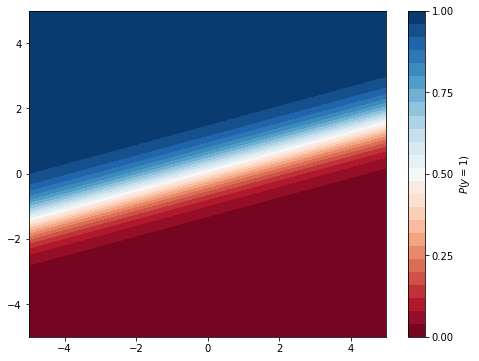

In [39]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 3], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")